In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
    # wget didnt work so I used urlib.request to get the data from the link address copied from the github.
import urllib.request
url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
filename = 'pizza_steak.zip'
file = urllib.request.urlretrieve(url, filename) # This will download the file on the computer
  # To extract the pizza file.zip and save it to the same location as your present notebook location.
zip_ref = zipfile.ZipFile("./pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
!dir pizza_steak\train\

 Volume in drive C is Windows-SSD
 Volume Serial Number is D242-1268

 Directory of c:\Deep_Learning\TensorFlow_For_Deep_Learning\pizza_steak\train

04-11-2024  10:09    <DIR>          .
04-11-2024  10:09    <DIR>          ..
04-11-2024  10:09    <DIR>          pizza
04-11-2024  10:09    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  357,249,761,280 bytes free


In [6]:
!dir pizza_steak\train\steak\

 Volume in drive C is Windows-SSD
 Volume Serial Number is D242-1268

 Directory of c:\Deep_Learning\TensorFlow_For_Deep_Learning\pizza_steak\train\steak

04-11-2024  10:09    <DIR>          .
04-11-2024  10:09    <DIR>          ..
04-11-2024  10:09            36,185 1000205.jpg
04-11-2024  10:09            34,497 100135.jpg
04-11-2024  10:09           116,802 101312.jpg
04-11-2024  10:09            56,754 1021458.jpg
04-11-2024  10:09            34,143 1032846.jpg
04-11-2024  10:09            24,688 10380.jpg
04-11-2024  10:09            37,134 1049459.jpg
04-11-2024  10:09            49,841 1053665.jpg
04-11-2024  10:09            59,983 1068516.jpg
04-11-2024  10:09            28,996 1068975.jpg
04-11-2024  10:09            29,525 1081258.jpg
04-11-2024  10:09            49,577 1090122.jpg
04-11-2024  10:09            59,976 1093966.jpg
04-11-2024  10:09            60,253 1098844.jpg
04-11-2024  10:09            69,843 1100074.jpg
04-11-2024  10:09            45,470 1105280.jpg
04-1

In [7]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [9]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [10]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


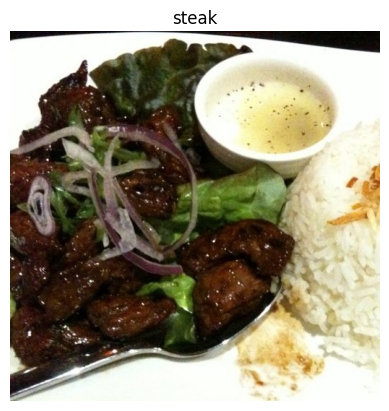

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

Image shape: (512, 512, 3)


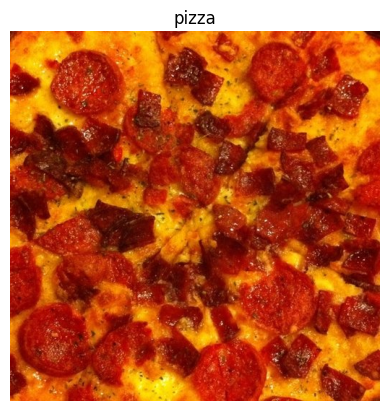

In [12]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [14]:
img

array([[[116,  43,   8],
        [106,  31,   0],
        [114,  37,  11],
        ...,
        [ 43,   3,   3],
        [ 40,   5,   3],
        [ 40,   6,   4]],

       [[ 95,  21,   0],
        [ 98,  22,   0],
        [112,  32,   7],
        ...,
        [ 43,   2,   0],
        [ 41,   3,   2],
        [ 40,   5,   1]],

       [[ 96,  17,   0],
        [ 99,  18,   0],
        [115,  31,   5],
        ...,
        [ 48,   4,   1],
        [ 47,   6,   4],
        [ 46,   7,   2]],

       ...,

       [[219,  90,   6],
        [211,  82,   0],
        [216,  87,   6],
        ...,
        [133,  34,   2],
        [130,  31,   0],
        [126,  27,   0]],

       [[232, 103,   9],
        [227,  98,   6],
        [233, 104,  13],
        ...,
        [126,  36,   2],
        [124,  34,   0],
        [117,  26,   0]],

       [[252, 124,  23],
        [247, 119,  20],
        [248, 118,  24],
        ...,
        [126,  40,   5],
        [128,  42,   9],
        [123,  37,   4]]

In [15]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[116,  43,   8],
        [106,  31,   0],
        [114,  37,  11],
        ...,
        [ 43,   3,   3],
        [ 40,   5,   3],
        [ 40,   6,   4]],

       [[ 95,  21,   0],
        [ 98,  22,   0],
        [112,  32,   7],
        ...,
        [ 43,   2,   0],
        [ 41,   3,   2],
        [ 40,   5,   1]],

       [[ 96,  17,   0],
        [ 99,  18,   0],
        [115,  31,   5],
        ...,
        [ 48,   4,   1],
        [ 47,   6,   4],
        [ 46,   7,   2]],

       ...,

       [[219,  90,   6],
        [211,  82,   0],
        [216,  87,   6],
        ...,
        [133,  34,   2],
        [130,  31,   0],
        [126,  27,   0]],

       [[232, 103,   9],
        [227,  98,   6],
        [233, 104,  13],
        ...,
        [126,  36,   2],
        [124,  34,   0],
        [117,  26,   0]],

       [[252, 124,  23],
        [247, 119,  20],
        [248, 118,  24],
        ...,
        [126,  40,   

In [ ]:
img / 255 # Normalizing all values to be between 0 & 1

array([[[0.45490196, 0.16862745, 0.03137255],
        [0.41568627, 0.12156863, 0.        ],
        [0.44705882, 0.14509804, 0.04313725],
        ...,
        [0.16862745, 0.01176471, 0.01176471],
        [0.15686275, 0.01960784, 0.01176471],
        [0.15686275, 0.02352941, 0.01568627]],

       [[0.37254902, 0.08235294, 0.        ],
        [0.38431373, 0.08627451, 0.        ],
        [0.43921569, 0.1254902 , 0.02745098],
        ...,
        [0.16862745, 0.00784314, 0.        ],
        [0.16078431, 0.01176471, 0.00784314],
        [0.15686275, 0.01960784, 0.00392157]],

       [[0.37647059, 0.06666667, 0.        ],
        [0.38823529, 0.07058824, 0.        ],
        [0.45098039, 0.12156863, 0.01960784],
        ...,
        [0.18823529, 0.01568627, 0.00392157],
        [0.18431373, 0.02352941, 0.01568627],
        [0.18039216, 0.02745098, 0.00784314]],

       ...,

       [[0.85882353, 0.35294118, 0.02352941],
        [0.82745098, 0.32156863, 0.        ],
        [0.84705882, 0